<a href="https://colab.research.google.com/github/PPM5658/AI_app/blob/main/Multi-object-detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
!pip install ultralytics opencv-python-headless timm sentence-transformers faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 32.4 MB/s eta 0:00:00


In [2]:
import cv2
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
print("Loading YOLOv8 model...")
model = YOLO('yolov8n.pt')
print("Model loaded successfully.")

Loading YOLOv8 model...
Model loaded successfully.


In [4]:
image_path = '/content/drive/MyDrive/Object tracking/Gemini_Generated_Image_6ewnwr6ewnwr6ewn.png'
try:
    frame = cv2.imread(image_path)
    if frame is None:
        raise FileNotFoundError(f"Image not found at path: {image_path}")
    print("Image loaded successfully.")
except Exception as e:
    print(e)

Image loaded successfully.


In [5]:
print("Running object detection...")
results = model(frame,conf=0.8,imgsz=1440)
print("Detection complete.")

Running object detection...

0: 1440x1440 2 cups, 1 bowl, 3 potted plants, 1 tv, 1 laptop, 1 keyboard, 27.7ms
Speed: 27.9ms preprocess, 27.7ms inference, 363.8ms postprocess per image at shape (1, 3, 1440, 1440)
Detection complete.


Displaying results...


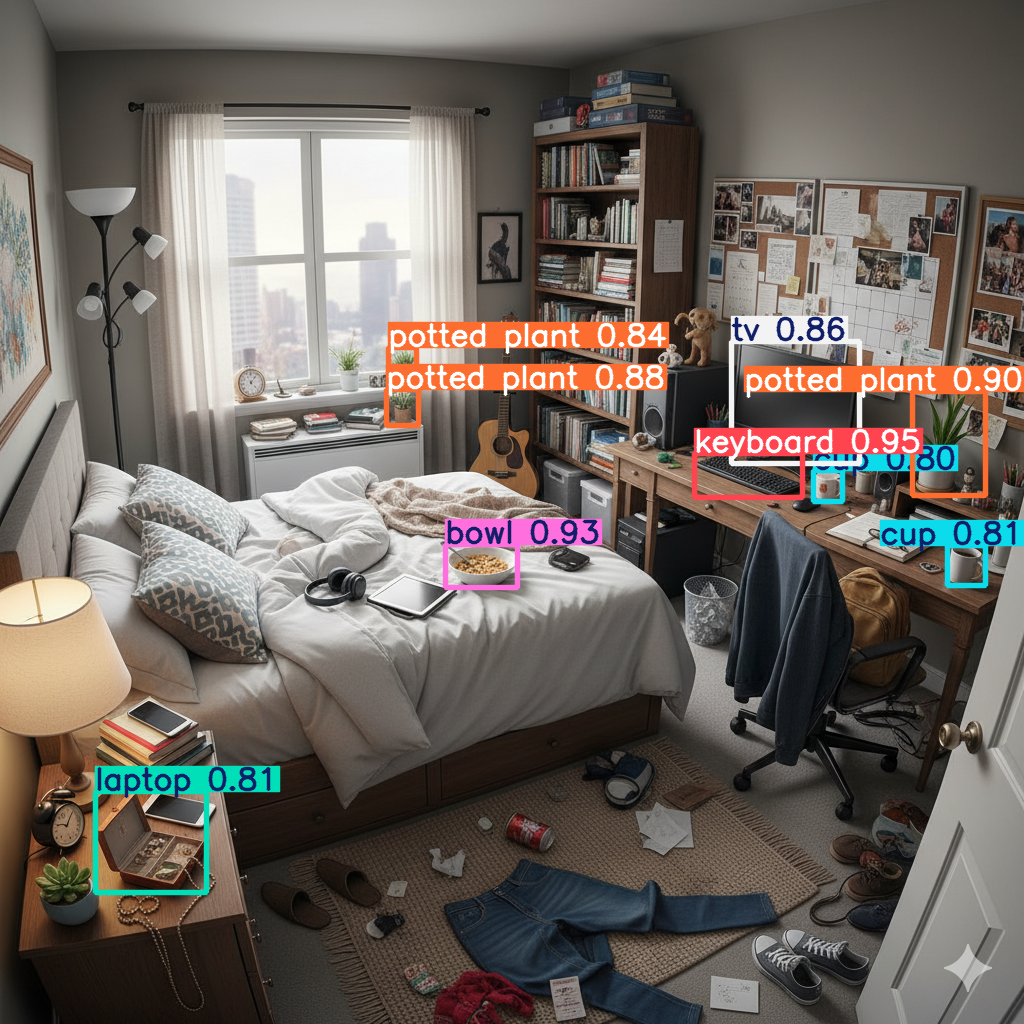

In [6]:
annotated_frame = results[0].plot()

print("Displaying results...")
cv2_imshow(annotated_frame)

Class names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone'

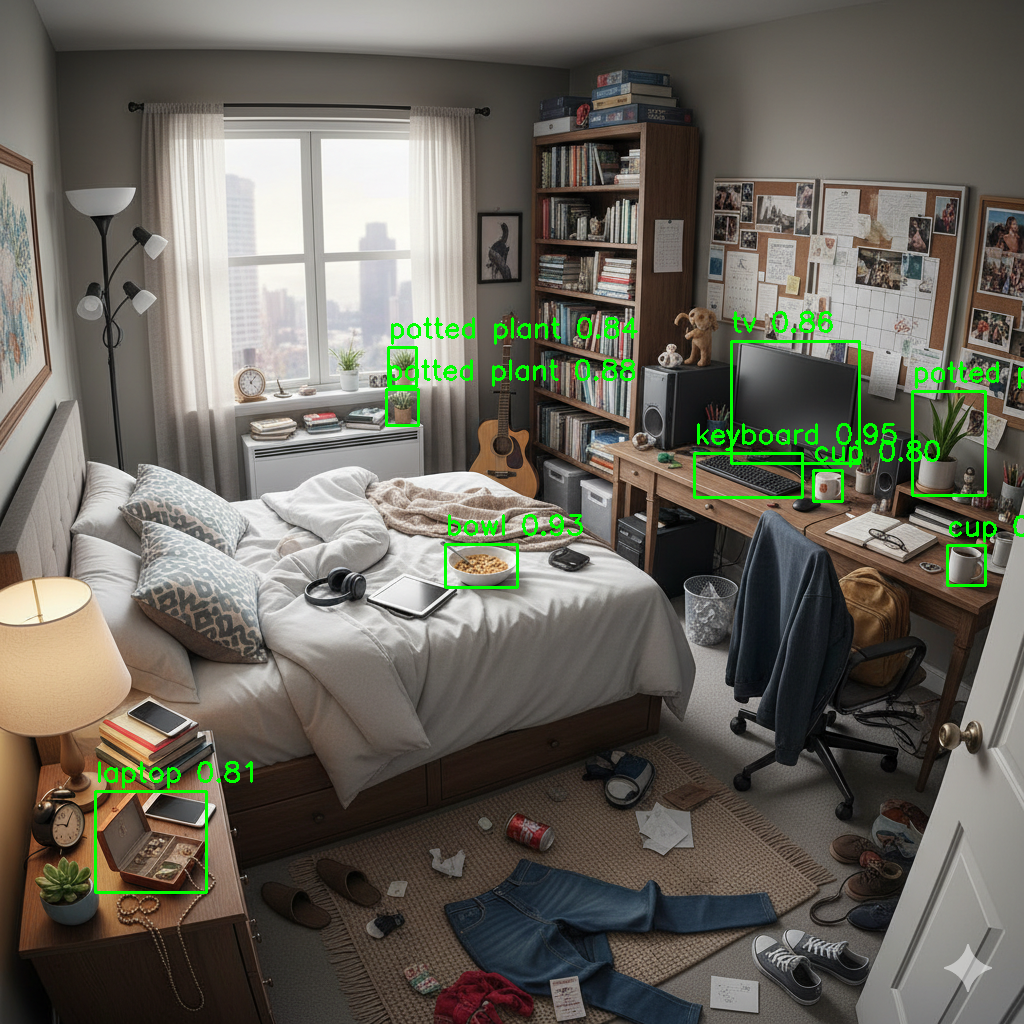

In [7]:
class_names = results[0].names
print(f"Class names: {class_names}\n")

print(f"Found {len(results[0].boxes)} objects in the image.")

for box in results[0].boxes:
    coords = box.xyxy[0].cpu().numpy().astype(int)
    x1, y1, x2, y2 = coords


    confidence = box.conf[0].cpu().numpy()

    class_id = int(box.cls[0].cpu().numpy())
    class_name = class_names[class_id]

    print(f"Object: {class_name} (ID: {class_id})")
    print(f"  - Confidence: {confidence:.2f}")
    print(f"  - Bounding Box: [x1:{x1}, y1:{y1}, x2:{x2}, y2:{y2}]")
    print("---")

    cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(frame, f"{class_name} {confidence:.2f}", (x1, y1 - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

cv2_imshow(frame)

In [8]:
video_path_in="/content/drive/MyDrive/Object tracking/20251013_102120.mp4"
cap = cv2.VideoCapture(video_path_in)
if not cap.isOpened():
    print(f"Error: Could not open video file at {video_path_in}")

w, h, fps = (int(cap.get(x)) for x in (cv2.CAP_PROP_FRAME_WIDTH, cv2.CAP_PROP_FRAME_HEIGHT, cv2.CAP_PROP_FPS))

print("Processing video frame by frame...")
frame_count = 0

Processing video frame by frame...


# Phase 2

In [9]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [10]:
print('Loading Model Midas')
model_type="MiDaS_small"
midas=torch.hub.load('intel-isl/MiDaS',model_type)

device=torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
midas.to(device)
midas.eval()
print('Model loaded successfully', device)

Loading Model Midas


/usr/local/lib/python3.12/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(


Downloading: "https://github.com/intel-isl/MiDaS/zipball/master" to /root/.cache/torch/hub/master.zip


/usr/local/lib/python3.12/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)


Loading weights:  None


/usr/local/lib/python3.12/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(


Downloading: "https://github.com/rwightman/gen-efficientnet-pytorch/zipball/master" to /root/.cache/torch/hub/master.zip
Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/tf_efficientnet_lite3-b733e338.pth" to /root/.cache/torch/hub/checkpoints/tf_efficientnet_lite3-b733e338.pth
Downloading: "https://github.com/isl-org/MiDaS/releases/download/v2_1/midas_v21_small_256.pt" to /root/.cache/torch/hub/checkpoints/midas_v21_small_256.pt


100%|██████████| 81.8M/81.8M [00:01<00:00, 70.9MB/s]


Model loaded successfully cuda


In [11]:
# Load transforms
midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")

# Select transform based on model type
if model_type == "MiDaS_small":
    transform = midas_transforms.small_transform
else:
    transform = midas_transforms.dpt_transform

Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master


In [12]:
frame=cv2.imread(image_path)
RGB=cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
input_batch=transform(RGB).to(device)

In [17]:
print("Running inference...")
with torch.no_grad():
    prediction=midas(input_batch)

    prediction=torch.nn.functional.interpolate(
        prediction.unsqueeze(1),
        size=frame.shape[:2],
        mode="bicubic",
        align_corners=False,
    ).squeeze()
depth_map=prediction.cpu().numpy()
print("Depth map generated successfully.")

Running inference...
Depth map generated successfully.


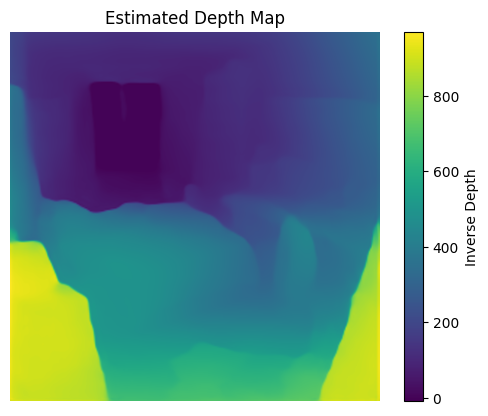

In [18]:
plt.imshow(depth_map, cmap='viridis')
plt.colorbar(label='Inverse Depth') # Add a color bar to show the scale
plt.title('Estimated Depth Map')
plt.axis('off')
plt.show()

Found 9 objects in the image.

Displaying results with manual drawings...


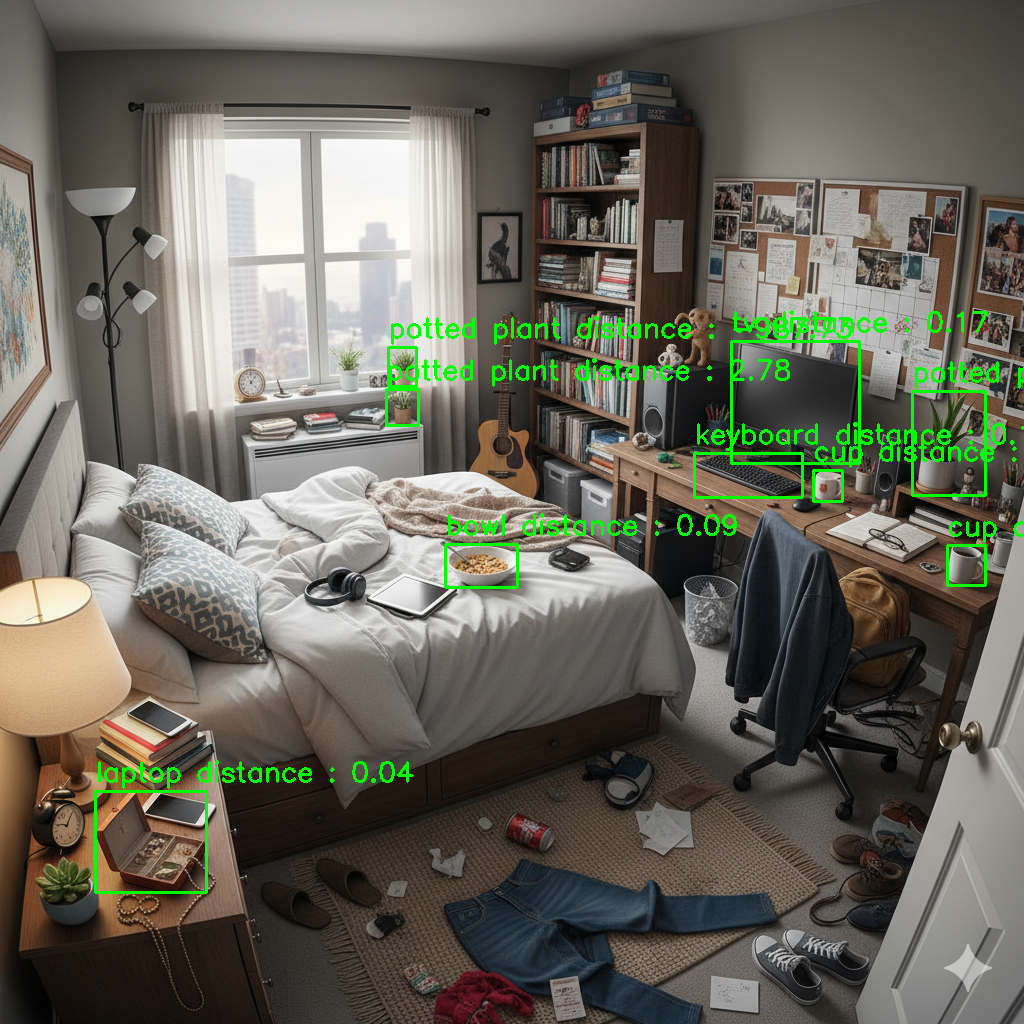

In [19]:
result = results[0]
class_names = result.names

print(f"Found {len(result.boxes)} objects in the image.")


for box in result.boxes:
    coords = box.xyxy[0].cpu().numpy().astype(int)
    x1, y1, x2, y2 = coords
    center_x = int((x1 + x2) / 2)
    center_y = int((y1 + y2) / 2)
    center_y_clamped = np.clip(center_y, 0, depth_map.shape[0] - 1)
    center_x_clamped = np.clip(center_x, 0, depth_map.shape[1] - 1)
    depth_value = depth_map[center_y_clamped, center_x_clamped]

    confidence = box.conf[0].cpu().numpy()
    class_id = int(box.cls[0].cpu().numpy())
    class_name = class_names[class_id]
    cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
    distance_in_meters = 33/ depth_value
    label_text = f"{class_name} distance : {distance_in_meters:.2f}"
    cv2.putText(frame, label_text, (x1, y1 - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
print("\nDisplaying results with manual drawings...")
cv2_imshow(frame)

In [20]:
# --- 2. Setup Video Input and Output ---
video_path_in = '/content/drive/MyDrive/Object tracking/test 3.mp4'
video_path_out = 'tracking_video_out.mp4'

cap = cv2.VideoCapture(video_path_in)
if not cap.isOpened():
    print(f"Error: Could not open video file at {video_path_in}")
else:
    # Get video properties to create the output file
    w, h, fps = (int(cap.get(x)) for x in (cv2.CAP_PROP_FRAME_WIDTH, cv2.CAP_PROP_FRAME_HEIGHT, cv2.CAP_PROP_FPS))
    # This object will write the processed frames into a new video file
    out = cv2.VideoWriter(video_path_out, cv2.VideoWriter_fourcc(*'mp4v'), fps, (w, h))

    # --- 3. The Main Video Processing Loop ---
    frame_count = 0
    while cap.isOpened():
        success, frame = cap.read()
        if not success:
            print("End of video reached.")
            break

        # A. Get the depth map for the entire frame using MiDaS
        img_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        input_batch = transform(img_rgb).to(device)
        with torch.no_grad():
            prediction = midas(input_batch)
            prediction = torch.nn.functional.interpolate(
                prediction.unsqueeze(1), size=img_rgb.shape[:2], mode="bicubic", align_corners=False
            ).squeeze()
        depth_map = prediction.cpu().numpy()

        # B. Run YOLO tracker to find and track objects
        results = model.track(frame, persist=True, conf=0.5)
        annotated_frame = frame.copy()

        # C. Reset the "closest object" competition for this frame
        closest_dist_meters = float('inf')
        closest_object_box = None

        # D. Process each detected object
        if results[0].boxes.id is not None:
            boxes = results[0].boxes.xyxy.cpu().numpy().astype(int)
            track_ids = results[0].boxes.id.cpu().numpy().astype(int)
            class_ids = results[0].boxes.cls.cpu().numpy().astype(int)

            for box, track_id, cls_id in zip(boxes, track_ids, class_ids):
                x1, y1, x2, y2 = box
                class_name = model.names[cls_id]

                # Get distance for this object
                center_x, center_y = int((x1 + x2) / 2), int((y1 + y2) / 2)
                depth_value = depth_map[center_y, center_x]
                distance_in_meters = 33 / depth_value

                # The Competition: Check if this object is the new winner
                if distance_in_meters < closest_dist_meters:
                    closest_dist_meters = distance_in_meters
                    closest_object_box = box

                # Draw a standard blue box and label for EVERY object
                label = f"ID:{track_id} {class_name} | {distance_in_meters:.2f}m"
                cv2.rectangle(annotated_frame, (x1, y1), (x2, y2), (255, 0, 0), 2) # Blue box
                cv2.putText(annotated_frame, label, (x1, y1 - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)

        # E. Highlight the final winner for this frame
        if closest_object_box is not None:
            x1, y1, x2, y2 = closest_object_box
            # Draw a thicker, bright red box on the closest object
            cv2.rectangle(annotated_frame, (x1, y1), (x2, y2), (0, 0, 255), 4) # Red box

        # F. Save the finished frame to the video file
        out.write(annotated_frame)

        if frame_count % 30 == 0:
            print(f"Processed {frame_count} frames.")
        frame_count += 1

    # --- 4. Cleanup ---
    print("Releasing video resources...")
    cap.release()
    out.release()
    cv2.destroyAllWindows()
    print(f"Processing complete. Output saved to: {video_path_out}")

requirements: Ultralytics requirement ['lap>=0.5.12'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 0.7s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


0: 384x640 1 bottle, 3 chairs, 1 dining table, 98.9ms
Speed: 2.4ms preprocess, 98.9ms inference, 21.8ms postprocess per image at shape (1, 3, 384, 640)
Processed 0 frames.

0: 384x640 1 bottle, 2 chairs, 1 dining table, 6.8ms
Speed: 2.6ms preprocess, 6.8ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 2 chairs, 1 dining table, 6.2ms
Speed: 2.3ms preprocess, 6.2ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 3 chairs, 1 dining table, 1 laptop, 6.3ms
Speed: 2.1ms preprocess, 6.3ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 bottle, 2 chairs, 1 dining table, 1 laptop, 6.2ms
Speed: 2.4ms preprocess, 6.2ms inference, 1.2ms postprocess per image at shape (1, 3, 

In [22]:
from sentence_transformers import SentenceTransformer

print('Loading sentence transformer model')
em_model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
print('Model loaded successfully')

Loading sentence transformer model


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Model loaded successfully


In [23]:

memory_log = list()
frame_count = 0

video_path_in = '/content/drive/MyDrive/Object tracking/test 3.mp4' # Ensure this path is correct
cap = cv2.VideoCapture(video_path_in)

if not cap.isOpened():
    print(f"Error: Could not open video file at {video_path_in}")
else:
    print("Video opened successfully. Starting frame processing...")
    while cap.isOpened():
        success, frame = cap.read()
        if not success:
            print("End of video reached.")
            break

        frame_count += 1
        print(f"\n--- Processing Frame {frame_count} ---")
        img_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        input_batch = transform(img_rgb).to(device)
        with torch.no_grad():
            prediction = midas(input_batch)
            prediction = torch.nn.functional.interpolate(
                prediction.unsqueeze(1), size=img_rgb.shape[:2], mode="bicubic", align_corners=False
            ).squeeze()
        depth_map = prediction.cpu().numpy()

        # Run YOLO Tracker
        # Let's lower the confidence slightly for this test to ensure we get detections
        results = model.track(frame, persist=True, conf=0.4)

        # --- DIAGNOSTIC STEP 1: Check for ANY detections ---
        num_detections = len(results[0].boxes)
        print(f"Step 1: YOLO found {num_detections} potential objects in this frame.")

        # --- DIAGNOSTIC STEP 2: Check if the TRACKER assigned IDs ---
        if results[0].boxes.id is not None:
            print(f"Step 2: SUCCESS! The tracker has assigned IDs. Proceeding to log memories.")

            # Get all the tracking data
            boxes = results[0].boxes.xyxy.cpu().numpy().astype(int)
            track_ids = results[0].boxes.id.cpu().numpy().astype(int)
            class_ids = results[0].boxes.cls.cpu().numpy().astype(int)

            timestamp = cap.get(cv2.CAP_PROP_POS_MSEC) / 1000

            for box, track_id, class_id in zip(boxes, track_ids, class_ids):
                class_name = model.names[class_id]

                # Calculate distance
                center_x = int((box[0] + box[2]) / 2)
                center_y = int((box[1] + box[3]) / 2)
                # Ensure center_y and center_x are within the bounds of the depth_map
                center_y_clamped = np.clip(center_y, 0, depth_map.shape[0] - 1)
                center_x_clamped = np.clip(center_x, 0, depth_map.shape[1] - 1)

                depth_value = depth_map[center_y_clamped, center_x_clamped]
                distance_in_meters = 33 / depth_value

                # Create the detailed event description
                event_description = (
                    f"At {timestamp:.1f}s, ID {track_id} ('{class_name}') was at {distance_in_meters:.2f}m."
                )

                # --- DIAGNOSTIC STEP 3: Confirm that append is called ---
                print(f"  -> Step 3: Appending memory for object ID {track_id}.")
                memory_log.append(event_description)
        else:
            # This will tell us if the gatekeeper check is the problem
            print(f"Step 2: FAILED. The tracker did not assign IDs in this frame. No memories logged.")


print("\n--- SCRIPT FINISHED ---")
print("\n--- COMPLETE MEMORY LOG ---")
if not memory_log:
    print("The memory log is empty. Check the diagnostic steps above.")
else:
    print(f"Total memories created: {len(memory_log)}")

    for entry in memory_log[:10]:
        print(entry)

Streaming output truncated to the last 5000 lines.
  -> Step 3: Appending memory for object ID 51.
  -> Step 3: Appending memory for object ID 48.
  -> Step 3: Appending memory for object ID 47.

--- Processing Frame 41 ---

0: 384x640 1 bottle, 1 cup, 1 bowl, 3 chairs, 1 dining table, 1 laptop, 7.2ms
Speed: 3.1ms preprocess, 7.2ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)
Step 1: YOLO found 8 potential objects in this frame.
Step 2: SUCCESS! The tracker has assigned IDs. Proceeding to log memories.
  -> Step 3: Appending memory for object ID 1.
  -> Step 3: Appending memory for object ID 43.
  -> Step 3: Appending memory for object ID 44.
  -> Step 3: Appending memory for object ID 46.
  -> Step 3: Appending memory for object ID 49.
  -> Step 3: Appending memory for object ID 51.
  -> Step 3: Appending memory for object ID 48.
  -> Step 3: Appending memory for object ID 47.

--- Processing Frame 42 ---

0: 384x640 1 bottle, 1 cup, 1 bowl, 4 chairs, 1 dining tabl

In [24]:
import faiss
import numpy as np

In [25]:
if memory_log:
  print('Building the vector memory database')
  event_embeddings = em_model.encode(memory_log)
  dimension=event_embeddings.shape[1]
  vector_database=faiss.IndexFlatL2(dimension)
  vector_database.add(event_embeddings.astype('float32'))
  print('Database built successfully')
  print(f"\n✅ Success! Database built with {vector_database.ntotal} memories.")
  print("The system is now ready to answer questions.")

Building the vector memory database
Database built successfully

✅ Success! Database built with 2806 memories.
The system is now ready to answer questions.


In [26]:
## =====================================================================================
##  Step 1: Configure the AI Model (Run this once)
## =====================================================================================
import google.generativeai as genai
from google.colab import userdata

# Load your API key from Colab secrets for security
try:
    api_key = userdata.get('gemini') # Make sure your secret is named 'gemini'
    genai.configure(api_key=api_key)
    # Initialize the Gemini model you want to use
    llm = genai.GenerativeModel('gemini-2.5-flash')
    print("✅ Gemini API configured successfully.")
except Exception as e:
    print(f"❌ Error configuring Gemini API: {e}")
    print("Please ensure your API key is stored as a secret named 'gemini' in Colab.")

## =====================================================================================
##  Step 2: Create a function to SEARCH the memory
## =====================================================================================
def query_memory(question, k=5):
    """Searches the vector database for the top 'k' memories related to the question."""

    # Safety check: Ensure the database exists and has memories
    if 'vector_database' not in globals() or vector_database.ntotal == 0:
        print("⚠️ Memory database is not built or is empty.")
        return None # Return None if there's no memory to search

    # Convert the question into a vector
    question_embedding = em_model.encode([question])

    # Search the database for the k most similar memories
    distances, indices = vector_database.search(question_embedding.astype('float32'), k=k)

    # Retrieve the original text for the top results
    retrieved_memories = [memory_log[i] for i in indices[0]]

    print("\n--- Top Retrieved Memories ---")
    for i, memory in enumerate(retrieved_memories):
        print(f"{i+1}. {memory}")

    return retrieved_memories

## =====================================================================================
##  Step 3: Create a function to ANSWER the question using the search results
## =====================================================================================
def answer_question(question):
    """Generates a final, conversational answer using the retrieved memories and Gemini."""

    # Use our search function to get the most relevant context
    context = query_memory(question)

    # If the search returned no relevant memories, we can stop here.
    if context is None:
        return "I can't answer that question as my memory is currently empty."

    # Join the list of memories into a single block of text
    context_string = "\n".join(context)

    # Create the final prompt for the LLM
    prompt = f"""
    You are an AI assistant with a perfect memory of a video you just watched.
    Answer the user's question based ONLY on the following facts from your memory.
    If the facts don't contain the answer, say that I didn't find the object in the memory.

    --- MEMORY CONTEXT ---
    {context_string}
    --- END OF MEMORY ---

    User Question: {question}

    Answer:
    """

    try:
        print("\n🤖 Generating final answer with Gemini...")

        response = llm.generate_content(prompt)
        return response.text
    except Exception as e:
        print(f"❌ An error occurred while generating the answer: {e}")
        return "Sorry, I encountered an error while trying to generate a response."

✅ Gemini API configured successfully.


In [29]:
answer_question("WHat is the laptop position at the end?")
# ask_question("Tell me about any people in the video.")
# answer_question("Was there a laptop on the desk?")
# ask_question("What objects were detected around the 5-second mark?")


--- Top Retrieved Memories ---
1. At 5.8s, ID 48 ('laptop') was at 0.06m.
2. At 5.8s, ID 48 ('laptop') was at 0.06m.
3. At 6.5s, ID 48 ('laptop') was at 0.06m.
4. At 6.5s, ID 48 ('laptop') was at 0.06m.
5. At 6.5s, ID 48 ('laptop') was at 0.06m.

🤖 Generating final answer with Gemini...


'The laptop position at the end (6.5s) was 0.06m.'

In [100]:
!pip install -q -U google-generativeai